Code by Kartik Kumar Srivastava <br>
**Project: Fashion MNIST CNN Analysis** <br>
This Project is based on CNN and can identify the facial features of a human face and predict their mood, based on facial features

In [ ]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


The Fashion MNIST datasets has 70,000 28x28 grayscale images. The class labels are :


---


Label	Description

0 T-shirt/top


1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

4423680/4422102 [==============================] - 0s 0us/step


<Figure size 432x288 with 0 Axes>

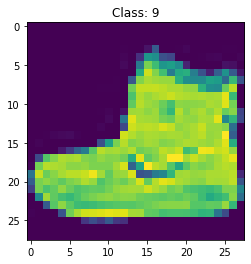

<Figure size 432x288 with 0 Axes>

In [ ]:
# Loading Dataset
from keras.datasets import fashion_mnist
(x_train, x_lab),(y_test, y_lab) = fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

<Figure size 432x288 with 0 Axes>

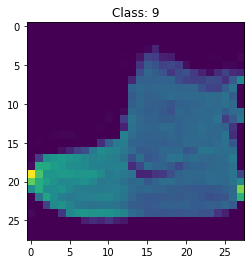

<Figure size 432x288 with 0 Axes>

In [ ]:
# Normalizing the Data
x_train = keras.utils.normalize(x_train, axis = 1)
y_test = keras.utils.normalize(y_test, axis = 1)
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

In [ ]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compiling the Model
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

# Fitting the Model
model.fit(x_train, x_lab, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.4945 - accuracy: 0.8220
Epoch 2/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.3624 - accuracy: 0.8675
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.3226 - accuracy: 0.8813
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3004 - accuracy: 0.8875
Epoch 5/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.2790 - accuracy: 0.8953
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.2635 - accuracy: 0.9014
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2486 - accuracy: 0.9062
Epoch 8/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2382 - accuracy: 0.9108
Epoch 9/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.2262 - accuracy: 0.9141
Epoch 10/20
60000/60000 [=====================

In [ ]:
# Evaluating on the Test Data
model.evaluate(y_test, y_lab)

10000/10000 [==============================] - 0s 37us/step


[0.39734082596302034, 0.8784999847412109]

In [ ]:
# Predict the first 10 images, Probability Distribution
p = model.predict(y_test[:10])
print(p)

[[1.55650818e-12 2.49745653e-16 1.95375804e-09 1.85846113e-11
  5.15285210e-12 2.88574142e-07 2.71171613e-10 9.76626234e-06
  7.34742302e-12 9.99989986e-01]
 [2.57405895e-03 1.57324279e-10 9.71505940e-01 3.43803208e-08
  2.51567382e-02 9.75496960e-07 7.61428615e-04 1.20663316e-07
  9.13215892e-10 6.06367962e-07]
 [3.27276872e-08 1.00000000e+00 4.07492963e-12 1.06049383e-08
  5.84543733e-11 5.13111587e-14 1.78057694e-10 2.45411385e-16
  7.14311856e-13 6.97391236e-16]
 [7.50909820e-11 1.00000000e+00 1.76115870e-14 2.15220752e-09
  2.12298193e-10 1.84019390e-15 5.22524211e-12 4.69097972e-18
  4.47710996e-15 6.31208994e-18]
 [2.87012309e-01 6.50544809e-12 4.10996116e-04 5.23976050e-05
  2.65868590e-03 4.20545007e-07 7.09865153e-01 3.79081280e-11
  2.20169181e-08 5.05029529e-09]
 [4.00992030e-06 9.99995708e-01 9.23665233e-09 6.22400904e-08
  8.18119688e-08 1.20216955e-14 1.48919908e-08 1.27312047e-13
  5.81237836e-12 9.90228632e-16]
 [1.73635115e-08 2.29793753e-11 2.21936521e-03 1.92201852e

In [ ]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_lab[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


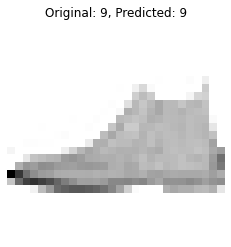

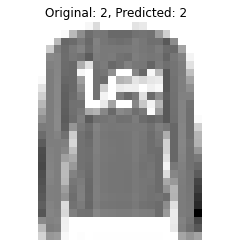

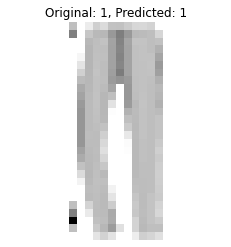

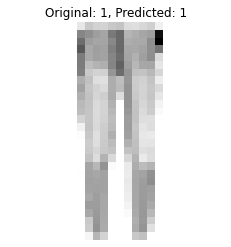

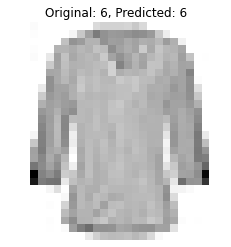

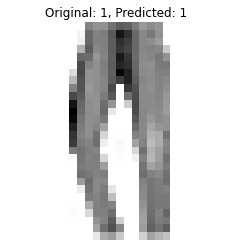

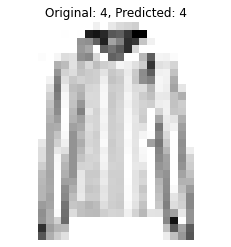

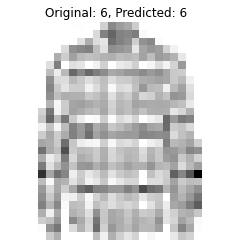

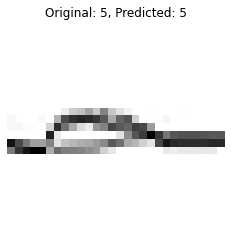

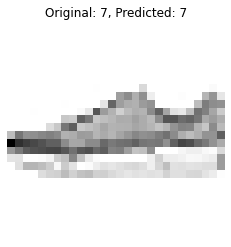

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing the result
for i in range(10):
  plt.imshow(y_test[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_lab[i], pred[i]))
  plt.axis("Off")
  plt.figure()